# PRJNA735936 - Rouchka et al.

Article link: [https://www.mdpi.com/2076-0817/10/10/1271](https://www.mdpi.com/2076-0817/10/10/1271).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA735936"
lineages_in_paper <- c("P.1", "B.1.429", "B.1.427", "B.1.351", "B.1.1.7", "B.1.526", "B.1.525")


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population,sample_type
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>
1,10043,+10044.C,ins:10044:1,0,8849,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
2,10044,+10045.T,ins:10045:1,0,8847,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
3,10046,+10047.T,ins:10047:1,0,8841,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
4,10050,+10051.G,ins:10051:1,0,8809,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
5,10057,+10058.G,ins:10058:1,0,1022,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
6,10059,+10060.T,ins:10060:1,0,1022,0,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]  7 93

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in rep(10, length = nrow(lineage_defs)):
"first element used of 'length.out' argument"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"
Warning message in optim(theta.old, fun, gradient, control = control, method = method, :
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"


   user  system elapsed 
323.103 135.066 570.683 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population,sample_type
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>
1,9.640401e-02,NA,NA,B.1.1.7,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
2,1.596310e-01,NA,NA,P.1,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
3,2.603688e-01,NA,NA,B.1.525,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
4,2.384840e-12,NA,NA,B.1.351,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
5,2.704477e-01,NA,NA,B.1.427,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,
6,1.932658e-04,NA,NA,B.1.526,SRR14758544,2021-05-10,s1122,295,2515972053,PRJNA735936,NA,NA,


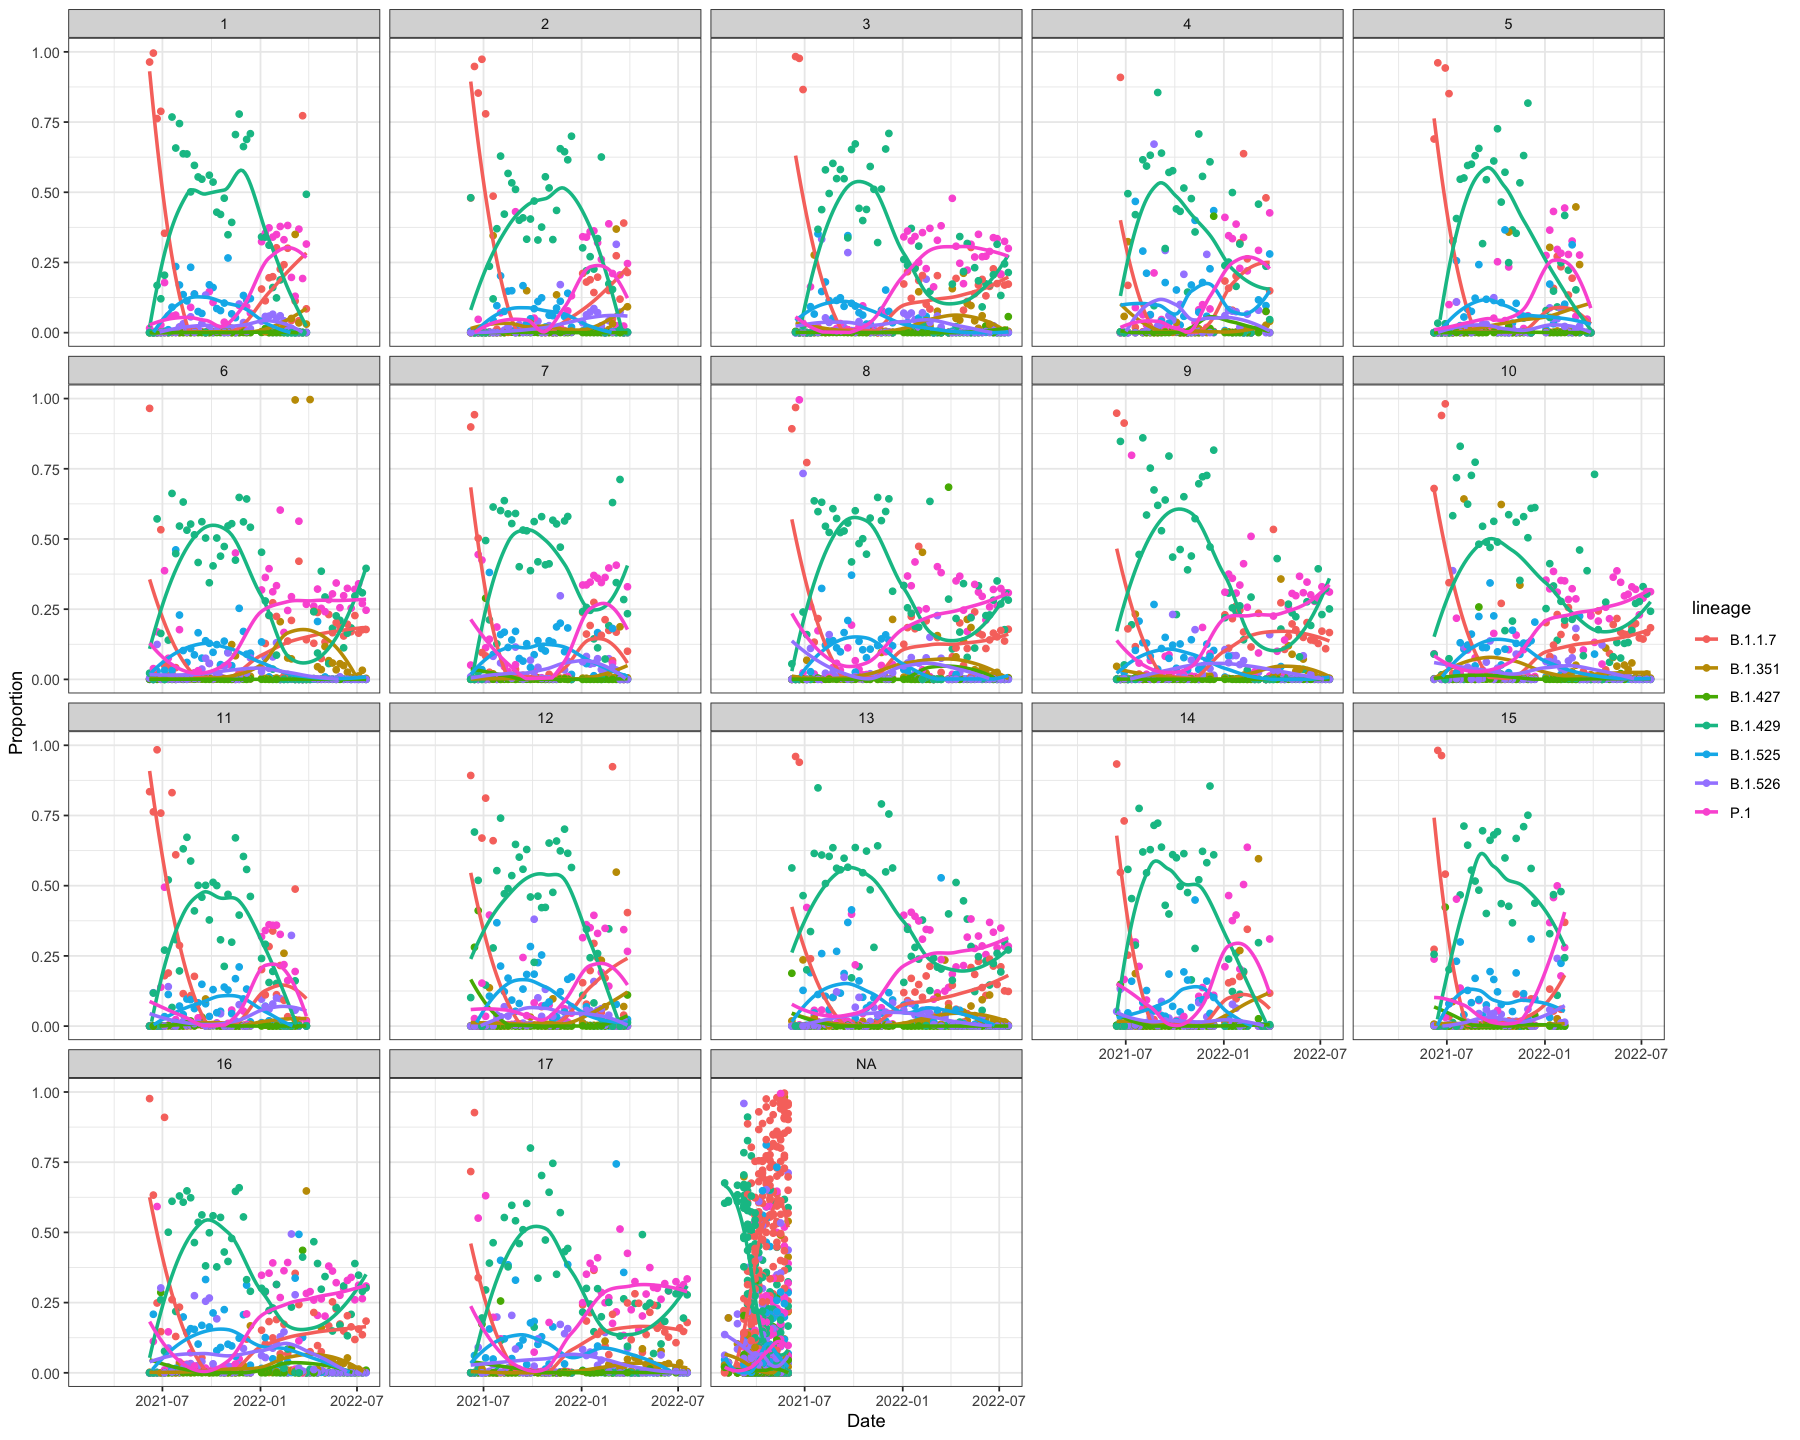

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
